<a href="https://colab.research.google.com/github/AndrewB01/economic_dataanalytics_project/blob/main/economic_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
## intall api, "/dev/null avoids all installation message to be display"
!pip install fredapi > /dev/null

## Import libraries and API

In [111]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

# Import API key from secret key
from google.colab import userdata
fredAPI = userdata.get('fredAPI')


# 1. Create the Fred object


In [70]:
fred = Fred(api_key=fredAPI)

# 2. Search for economic Data

In [5]:
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2024-06-23,2024-06-23,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-05-28 08:11:02-05:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2024-06-23,2024-06-23,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-05-28 08:11:04-05:00,78,"For more information regarding the index, plea..."
SP500,SP500,2024-06-23,2024-06-23,S&P 500,2014-06-23,2024-06-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-21 19:11:01-05:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2024-06-23,2024-06-23,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-05-28 08:11:05-05:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2024-06-23,2024-06-23,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-05-28 08:11:39-05:00,33,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDOI02CYA156NWDB,DDOI02CYA156NWDB,2024-06-23,2024-06-23,Bank Deposits to GDP for Cyprus,1975-01-01,2007-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:31:03-05:00,3,"The total value of demand, time and saving dep..."
DDDI05DZA156NWDB,DDDI05DZA156NWDB,2024-06-23,2024-06-23,Liquid Liabilities to GDP for Algeria,1964-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:50-05:00,3,Ratio of liquid liabilities to GDP. Liquid lia...
DDDM07ECA156NWDB,DDDM07ECA156NWDB,2024-06-23,2024-06-23,Outstanding Total International Debt Securitie...,1980-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:29:11-05:00,3,Amount of international debt securities (amoun...


In [6]:
fred.search('S&P').columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [7]:
sp_search = fred.search('S&P', order_by='popularity')

In [8]:
sp_search.shape

(1000, 15)

In [9]:
sp_search.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-23,2024-06-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-21 09:18:12-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-23,2024-06-23,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-05-28 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-23,2024-06-23,S&P 500,2014-06-23,2024-06-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-21 19:11:01-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-23,2024-06-23,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-23,2024-06-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-21 09:18:14-05:00,82,This data represents the effective yield of th...


# 3. Pull Raw Data

In [11]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P500'}>

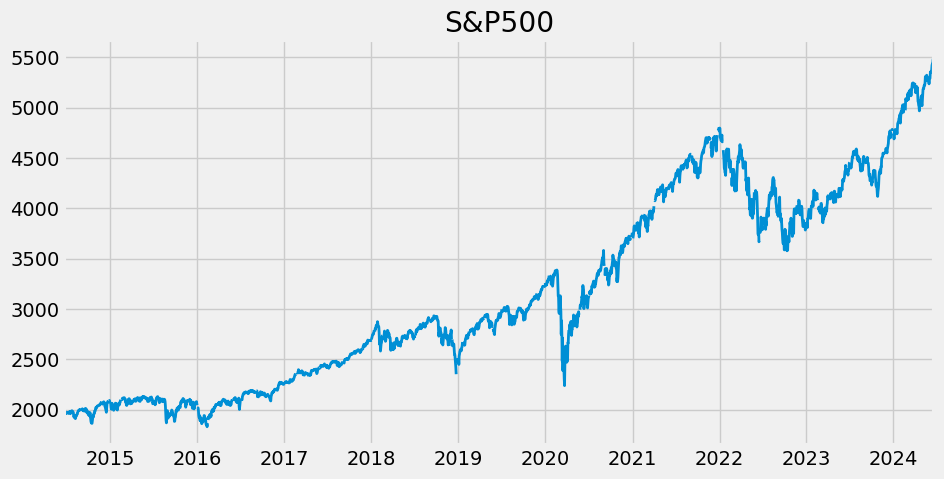

In [16]:
sp500.plot(figsize=(10,5), title = "S&P500", lw=2)

# 4. Pull and Join Multiple Data Series

In [64]:
uemp_results =  fred.search('unemployment')
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-23,2024-06-23,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-06-23,2024-06-23,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-07 07:50:02-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-06-23,2024-06-23,Unemployment Level,1948-01-01,2024-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-06-07 07:51:06-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-06-23,2024-06-23,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-06-23,2024-06-23,Continued Claims (Insured Unemployment),1967-01-07,2024-06-08,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-06-20 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-06-23,2024-06-23,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-06-23,2024-06-23,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-06-23,2024-06-23,Unemployment Rate - Married Women,1955-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:42-05:00,9,To obtain estimates of women worker employment...


In [89]:
unrate = fred.get_series('UNRATE')
unrate


1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
Length: 917, dtype: float64

In [120]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
len(unemp_df)



856

In [121]:
all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name = myid)
  all_results.append(results)
  # time.sleep(0.5)
  break

In [122]:
pd.concat(all_results, axis=1)

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-01-01,3.7
2024-02-01,3.9
2024-03-01,3.8
2024-04-01,3.9
